In [20]:
# import os
import pickle
import random

import matplotlib.pyplot as plt
import numpy as np
# import pandas as pd

from tactile_encoding.utils.utils import value2key

# from sklearn.preprocessing import minmax_scale


In [21]:
max_trials = 100

classes_list = {
    'A': "Tonic spiking",
    'B': "Class 1",
    'C': "Spike frequency adaptation",
    'D': "Phasic spiking",
    'E': "Accommodation",
    'F': "Threshold variability",
    'G': "Rebound spike",
    'H': "Class 2",
    'I': "Integrator",
    'J': "Input bistability",
    'K': "Hyperpolarizing spiking",
    'L': "Hyperpolarizing bursting",
    'M': "Tonic bursting",
    'N': "Phasic bursting",
    'O': "Rebound burst",
    'P': "Mixed mode",
    'Q': "Afterpotentials",
    'R': "Basal bistability",
    'S': "Preferred frequency",
    'T': "Spike latency",
}


### Create subplots

In [22]:
def two_scales(ax1, time, data1, data2, data3, c1, c2, c3, create_xlabel=False, create_ylabel1=False, create_ylabel2=False):
    ax2 = ax1.twinx()

    # plot voltage trace
    ax1.plot(time, data1, color=c1)

    # input current trace
    ax2.plot(time, data2, color=c2, alpha=0.6)

    # spike times at peak of voltage trace
    # TODO check spike times! Now the v at t-1 is selected
    ax1.scatter(np.where(data3 == 1)[0], data1[np.where(
        data3 == 1)-np.ones_like(np.where(data3 == 1))], s=15, color=c3)

    # TODO set tick size
    # ax1.set_xticks(fontsize=8)
    # create labels if needed
    if create_xlabel:
        ax1.set_xlabel('time (s)')
    if create_ylabel1:
        ax1.set_ylabel('voltage (V)')
    if create_ylabel2:
        ax2.set_ylabel('current (I)')

    return ax1, ax2


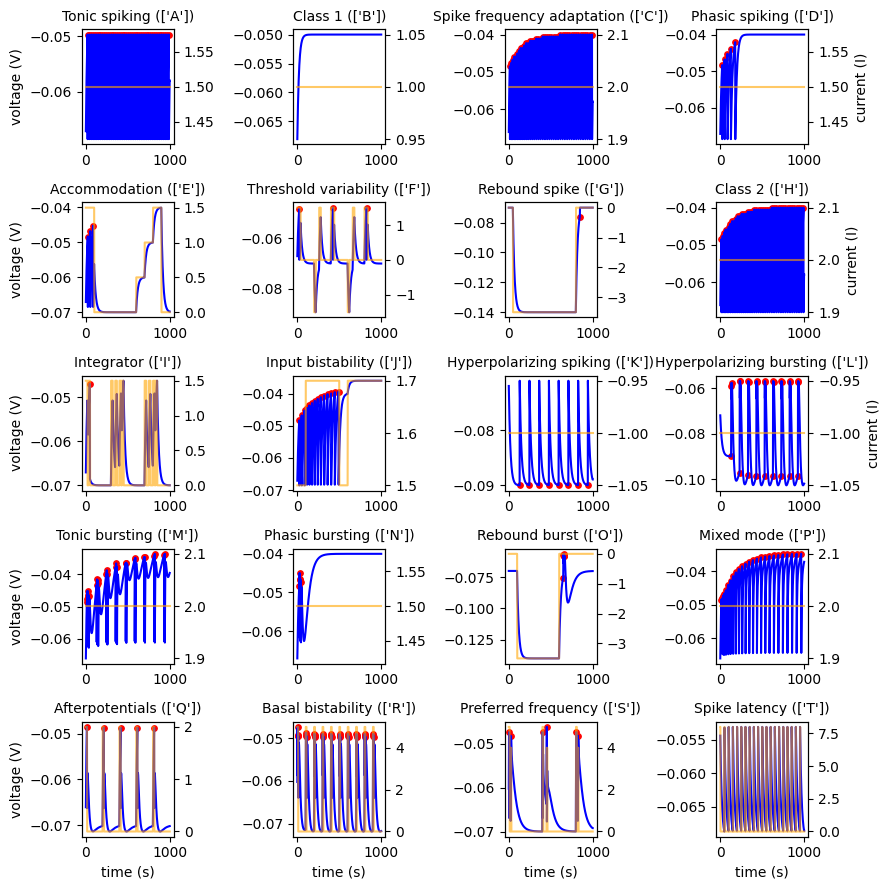

In [23]:
# infile = open("/space/fra/telluride2022/nte_encoding/tactile_encoding/data_encoding_original", 'rb')
infile = open("./data/data_encoding.pkl", 'rb')
encoded_data = pickle.load(infile)
infile.close()

plt.figure(figsize=(9, 9))
for num, el in enumerate(list(classes_list.values())):
    # select a sample trial out of max_trials
    pos = range(num*max_trials, num*max_trials+max_trials)
    pos = np.random.choice(pos)

    ax = plt.subplot(5, 4, num+1)
    plt.title("{} ({})".format(el, value2key(
        el, classes_list)), fontsize=10)

    # raster plot
    spikes = np.reshape(np.array(encoded_data[pos][0]), (np.array(
        encoded_data[pos][0]).shape[0]))

    # voltage trace
    voltage = np.reshape(np.array(encoded_data[pos][1]), (np.array(
        encoded_data[pos][1]).shape[0]))

    # input current trace
    input_current = np.reshape(np.array(encoded_data[pos][2]), (np.array(
        encoded_data[pos][2]).shape[0]))

    # only add labels on most outer subplot
    if num == 0 or num == 4 or num == 8 or num == 12:
        ax1, ax2 = two_scales(ax, range(1, len(voltage)+1), voltage, input_current, spikes, 'b',
                              'orange', 'r', create_xlabel=False, create_ylabel1=True, create_ylabel2=False)
    elif num == 3 or num == 7 or num == 11:
        ax1, ax2 = two_scales(ax, range(1, len(voltage)+1), voltage, input_current, spikes, 'b',
                              'orange', 'r', create_xlabel=False, create_ylabel1=False, create_ylabel2=True)
    elif num == 16:
        ax1, ax2 = two_scales(ax, range(1, len(voltage)+1), voltage, input_current, spikes,
                              'b', 'orange', 'r', create_xlabel=True, create_ylabel1=True, create_ylabel2=False)
    elif num > 16 and num < 20:
        ax1, ax2 = two_scales(ax, range(1, len(voltage)+1), voltage, input_current, spikes, 'b',
                              'orange', 'r', create_xlabel=True, create_ylabel1=False, create_ylabel2=False)
    elif num == 20:
        ax1, ax2 = two_scales(ax, range(1, len(voltage)+1), voltage, input_current, spikes,
                              'b', 'orange', 'r', create_xlabel=True, create_ylabel1=False, create_ylabel2=True)
    else:
        ax1, ax2 = two_scales(ax, range(1, len(voltage)+1), voltage, input_current, spikes, 'b',
                              'orange', 'r', create_xlabel=False, create_ylabel1=False, create_ylabel2=False)

plt.tight_layout()
plt.show()


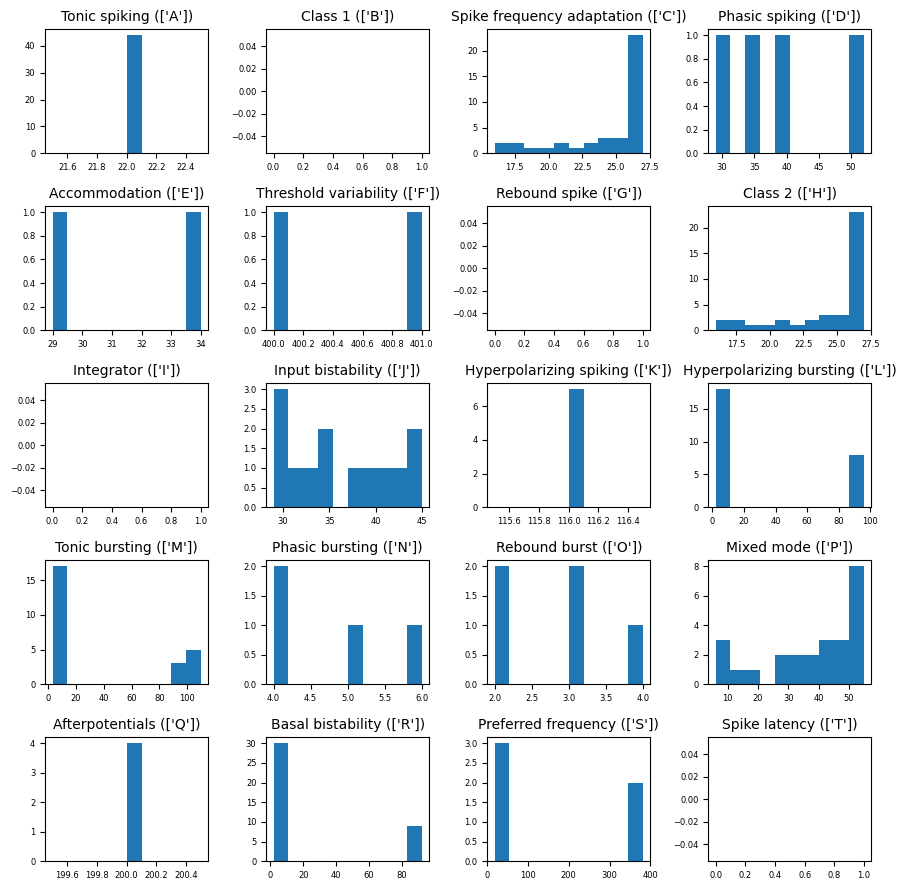

In [24]:
# ISI
plt.figure(figsize=(9, 9))
for num, el in enumerate(list(classes_list.values())):
    # select a sample trial out of max_trials
    pos = range(num*max_trials, num*max_trials+max_trials)
    pos = np.random.choice(pos)

    plt.subplot(5, 4, num+1)
    plt.title("{} ({})".format(el, value2key(
        el, classes_list)), fontsize=10)
    # TODO inlcude grid to all plots
    # plt.grid()

    # raster plot
    # print(spikes)
    spikes = np.reshape(np.array(encoded_data[pos][0]), (np.array(
        encoded_data[pos][0]).shape[0]))
    isi_original = np.diff(np.where(spikes == 1)[0])

    # only add labels on most outer subplot
    # if num == 16:
    plt.hist(isi_original)
    plt.tick_params(axis='x', labelsize=6)
    plt.tick_params(axis='y', labelsize=6)

plt.tight_layout()
plt.show()

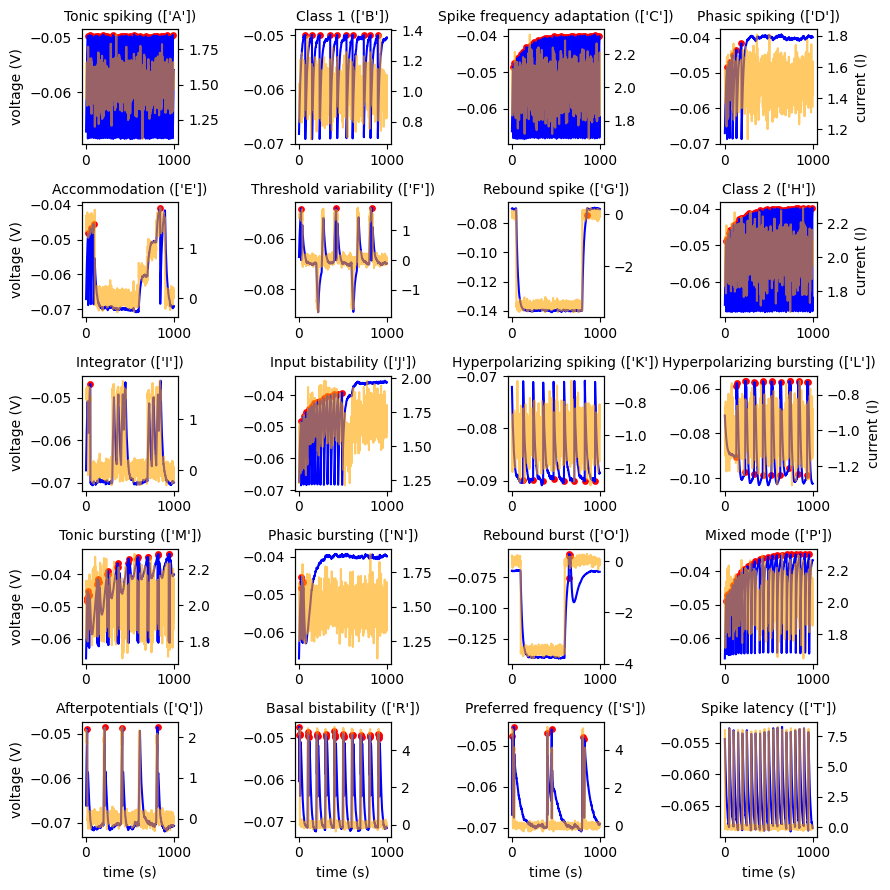

In [25]:
# infile = open("/space/fra/telluride2022/nte_encoding/tactile_encoding/data_encoding_original", 'rb')
infile = open("./data/data_encoding_noisy.pkl", 'rb')
encoded_data_noisy = pickle.load(infile)
infile.close()

plt.figure(figsize=(9, 9))
for num, el in enumerate(list(classes_list.values())):
    # select a sample trial out of max_trials
    pos = range(num*max_trials, num*max_trials+max_trials)
    pos = np.random.choice(pos)

    ax = plt.subplot(5, 4, num+1)
    plt.title("{} ({})".format(el, value2key(
        el, classes_list)), fontsize=10)

    # raster plot
    spikes = np.reshape(np.array(encoded_data_noisy[pos][0]), (np.array(
        encoded_data_noisy[pos][0]).shape[0]))

    # voltage trace
    voltage = np.reshape(np.array(encoded_data_noisy[pos][1]), (np.array(
        encoded_data_noisy[pos][1]).shape[0]))

    # input current trace
    input_current = np.reshape(np.array(encoded_data_noisy[pos][2]), (np.array(
        encoded_data_noisy[pos][2]).shape[0]))

    # only add labels on most outer subplot
    if num == 0 or num == 4 or num == 8 or num == 12:
        ax1, ax2 = two_scales(ax, range(1, len(voltage)+1), voltage, input_current, spikes, 'b',
                              'orange', 'r', create_xlabel=False, create_ylabel1=True, create_ylabel2=False)
    elif num == 3 or num == 7 or num == 11:
        ax1, ax2 = two_scales(ax, range(1, len(voltage)+1), voltage, input_current, spikes, 'b',
                              'orange', 'r', create_xlabel=False, create_ylabel1=False, create_ylabel2=True)
    elif num == 16:
        ax1, ax2 = two_scales(ax, range(1, len(voltage)+1), voltage, input_current, spikes,
                              'b', 'orange', 'r', create_xlabel=True, create_ylabel1=True, create_ylabel2=False)
    elif num > 16 and num < 20:
        ax1, ax2 = two_scales(ax, range(1, len(voltage)+1), voltage, input_current, spikes, 'b',
                              'orange', 'r', create_xlabel=True, create_ylabel1=False, create_ylabel2=False)
    elif num == 20:
        ax1, ax2 = two_scales(ax, range(1, len(voltage)+1), voltage, input_current, spikes,
                              'b', 'orange', 'r', create_xlabel=True, create_ylabel1=False, create_ylabel2=True)
    else:
        ax1, ax2 = two_scales(ax, range(1, len(voltage)+1), voltage, input_current, spikes, 'b',
                              'orange', 'r', create_xlabel=False, create_ylabel1=False, create_ylabel2=False)

plt.tight_layout()
plt.show()


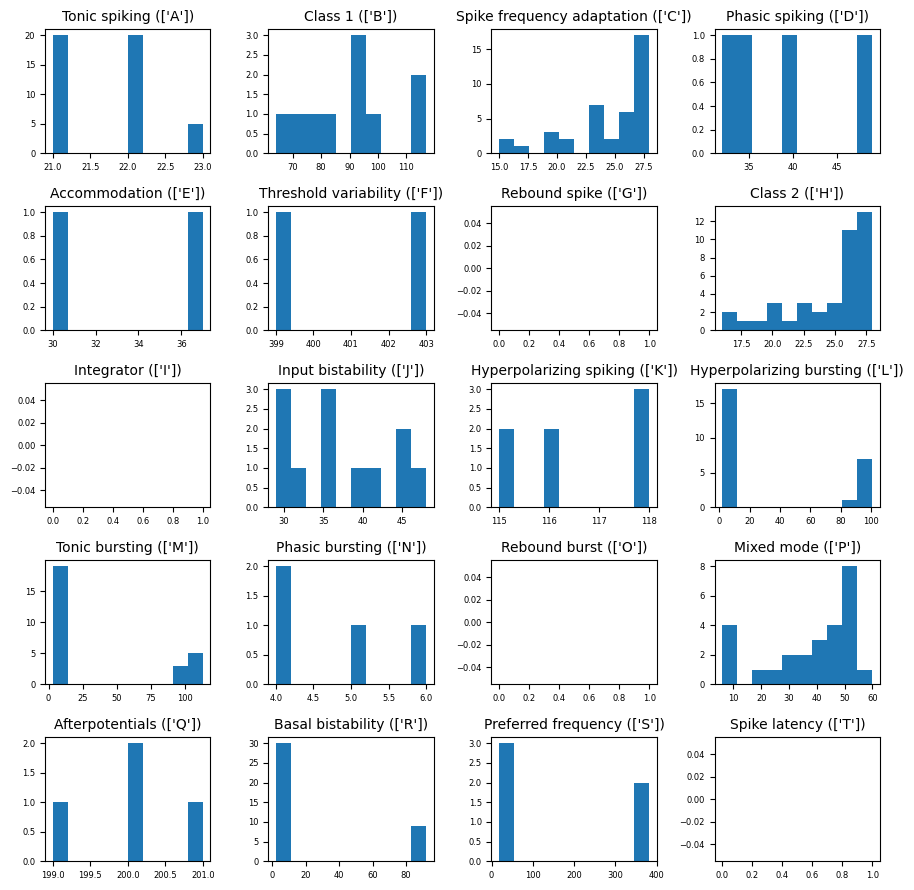

In [26]:
# ISI
plt.figure(figsize=(9, 9))
for num, el in enumerate(list(classes_list.values())):
# select a sample trial out of max_trials
    pos = range(num*max_trials, num*max_trials+max_trials)
    pos = np.random.choice(pos)

    plt.subplot(5, 4, num+1)
    plt.title("{} ({})".format(el, value2key(
        el, classes_list)), fontsize=10)
    # TODO inlcude grid to all plots
    # plt.grid()

    # raster plot
    # print(spikes)
    spikes = np.reshape(np.array(encoded_data_noisy[pos][0]), (np.array(
        encoded_data_noisy[pos][0]).shape[0]))
    isi_original_noisy = np.diff(np.where(spikes == 1)[0])

    # only add labels on most outer subplot
    # if num == 16:
    plt.hist(isi_original_noisy)
    plt.tick_params(axis='x', labelsize=6)
    plt.tick_params(axis='y', labelsize=6)

plt.tight_layout()
plt.show()

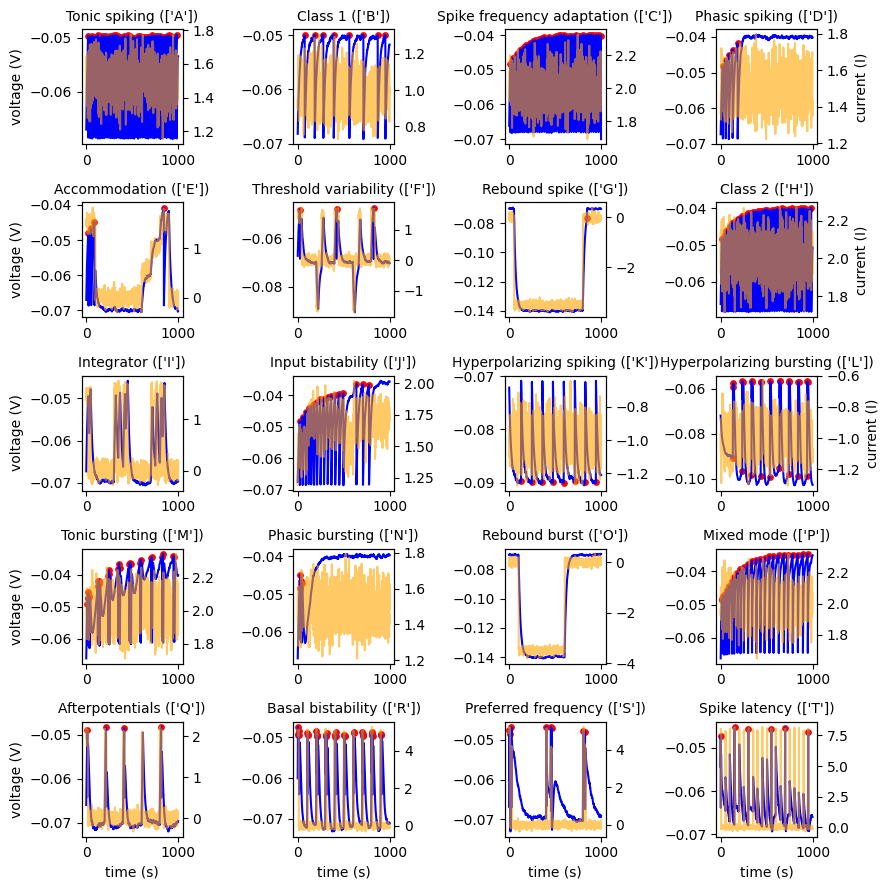

In [27]:
# infile = open("/space/fra/telluride2022/nte_encoding/tactile_encoding/data_encoding_original", 'rb')
infile = open("./data/data_encoding_noisy_temp_jitter.pkl", 'rb')
encoded_data_noisy_temp_jitter = pickle.load(infile)
infile.close()

plt.figure(figsize=(9, 9))
for num, el in enumerate(list(classes_list.values())):
    # select a sample trial out of max_trials
    pos = range(num*max_trials, num*max_trials+max_trials)
    pos = np.random.choice(pos)

    ax = plt.subplot(5, 4, num+1)
    plt.title("{} ({})".format(el, value2key(
        el, classes_list)), fontsize=10)

    # raster plot
    spikes = np.reshape(np.array(encoded_data_noisy_temp_jitter[pos][0]), (np.array(
        encoded_data_noisy_temp_jitter[pos][0]).shape[0]))

    # voltage trace
    voltage = np.reshape(np.array(encoded_data_noisy_temp_jitter[pos][1]), (np.array(
        encoded_data_noisy_temp_jitter[pos][1]).shape[0]))

    # input current trace
    input_current = np.reshape(np.array(encoded_data_noisy_temp_jitter[pos][2]), (np.array(
        encoded_data_noisy_temp_jitter[pos][2]).shape[0]))

    # only add labels on most outer subplot
    if num == 0 or num == 4 or num == 8 or num == 12:
        ax1, ax2 = two_scales(ax, range(1, len(voltage)+1), voltage, input_current, spikes, 'b',
                              'orange', 'r', create_xlabel=False, create_ylabel1=True, create_ylabel2=False)
    elif num == 3 or num == 7 or num == 11:
        ax1, ax2 = two_scales(ax, range(1, len(voltage)+1), voltage, input_current, spikes, 'b',
                              'orange', 'r', create_xlabel=False, create_ylabel1=False, create_ylabel2=True)
    elif num == 16:
        ax1, ax2 = two_scales(ax, range(1, len(voltage)+1), voltage, input_current, spikes,
                              'b', 'orange', 'r', create_xlabel=True, create_ylabel1=True, create_ylabel2=False)
    elif num > 16 and num < 20:
        ax1, ax2 = two_scales(ax, range(1, len(voltage)+1), voltage, input_current, spikes, 'b',
                              'orange', 'r', create_xlabel=True, create_ylabel1=False, create_ylabel2=False)
    elif num == 20:
        ax1, ax2 = two_scales(ax, range(1, len(voltage)+1), voltage, input_current, spikes,
                              'b', 'orange', 'r', create_xlabel=True, create_ylabel1=False, create_ylabel2=True)
    else:
        ax1, ax2 = two_scales(ax, range(1, len(voltage)+1), voltage, input_current, spikes, 'b',
                              'orange', 'r', create_xlabel=False, create_ylabel1=False, create_ylabel2=False)

plt.tight_layout()
plt.show()


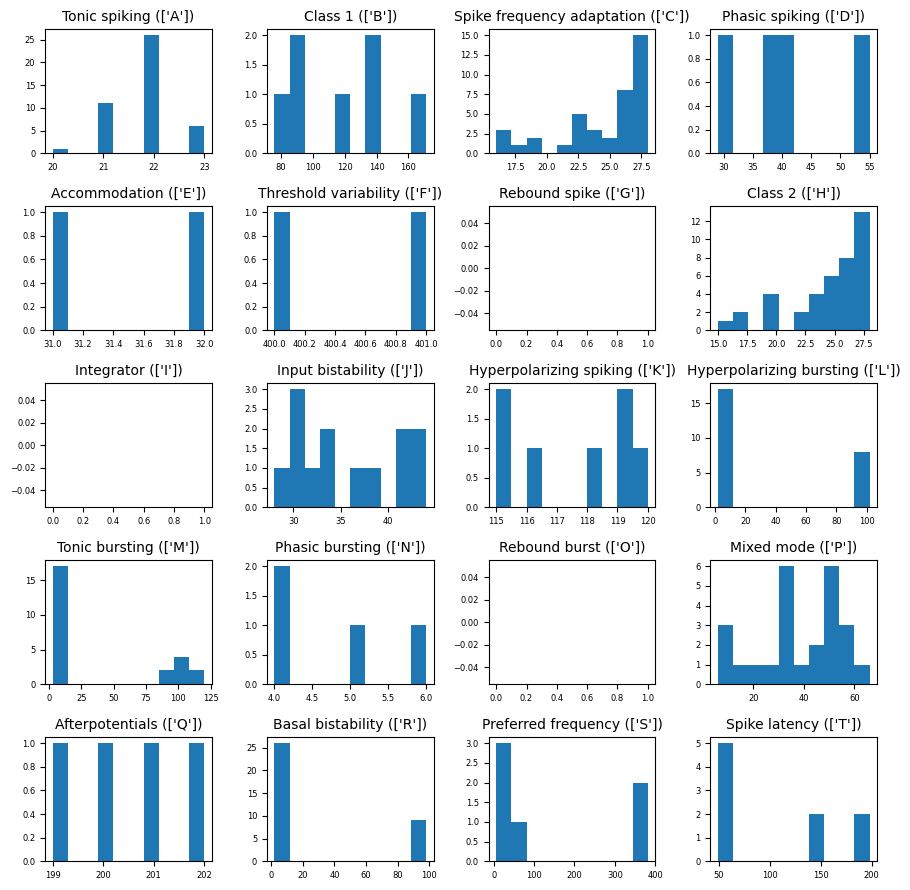

In [28]:
# ISI
plt.figure(figsize=(9, 9))
for num, el in enumerate(list(classes_list.values())):
    # select a sample trial out of max_trials
    pos = range(num*max_trials, num*max_trials+max_trials)
    pos = np.random.choice(pos)

    plt.subplot(5, 4, num+1)
    plt.title("{} ({})".format(el, value2key(
        el, classes_list)), fontsize=10)
    # TODO inlcude grid to all plots
    # plt.grid()

    spikes = np.reshape(np.array(encoded_data_noisy_temp_jitter[pos][0]), (np.array(
        encoded_data_noisy_temp_jitter[pos][0]).shape[0]))
    isi_original_noisy_temp_jitter = np.diff(np.where(spikes == 1)[0])

    # only add labels on most outer subplot
    # if num == 16:
    plt.hist(isi_original_noisy_temp_jitter)
    plt.tick_params(axis='x', labelsize=6)
    plt.tick_params(axis='y', labelsize=6)

plt.tight_layout()
plt.show()

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.